In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from patsy import dmatrices
import statsmodels.api as sm
import numpy as np
%matplotlib inline

df = pd.read_csv('../../../challenges_data/2013_movies.csv')
df.head()

df['DomesticTotalGross'] = df['DomesticTotalGross'].values.astype('float')

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
2,Frozen,150000000,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00
3,Despicable Me 2,76000000,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00
4,Man of Steel,225000000,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00


   Intercept
0          1
1          1
2          1
3          1
4          1


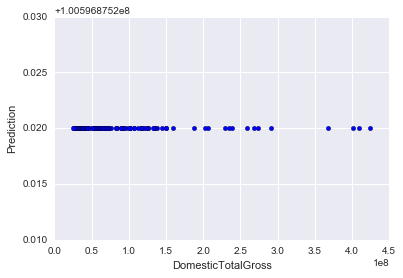

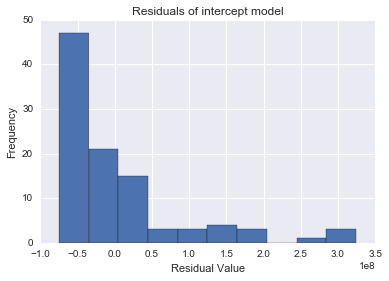

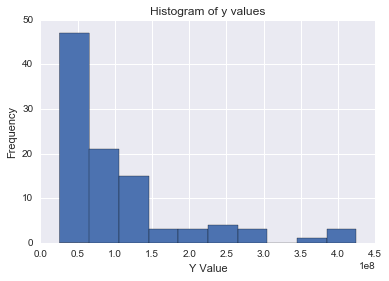

In [88]:
# Challenge 1

y, X = dmatrices('DomesticTotalGross ~ 1', data=df, return_type='dataframe')

print X.head()

olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
ypred = olsres.predict(X)

plt.scatter(y, ypred)
plt.xlabel('DomesticTotalGross')
plt.ylabel('Prediction')
plt.show

plt.figure()
residuals = (y['DomesticTotalGross'].values - ypred)
plt.hist(residuals)
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
plt.title('Residuals of intercept model')
plt.show()

plt.hist(y['DomesticTotalGross'].values)
plt.xlabel('Y Value')
plt.ylabel('Frequency')
plt.title('Histogram of y values')
plt.show()



# fig = plt.figure(figsize=(12,8))
# fig = sm.graphics.plot_regress_exog(results,'ProductionBudget', fig=fig)

I fit a model based on just a constant intercept.  The histogram of residuals looks a lot like the histogram of the original y values, but shifted by the mean.  This is not surprising, because the best an intercept model can do is always estimate the mean.

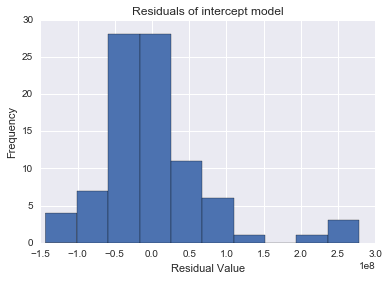

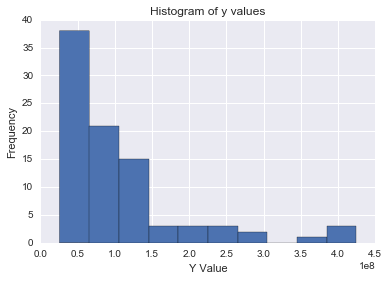

In [70]:
# Challenge 2

y, X = dmatrices('DomesticTotalGross ~ Budget', data=df, return_type='dataframe')

print X.head()

olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
ypred = olsres.predict(X)

residuals = (y['DomesticTotalGross'].values - ypred)
plt.hist(residuals)
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
plt.title('Residuals of intercept model')
plt.show()

plt.hist(y['DomesticTotalGross'].values)
plt.xlabel('Y Value')
plt.ylabel('Frequency')
plt.title('Histogram of y values')
plt.show()


Now the residuals of the model look like a normal distribution, except for the outliers. The model is behaving more like a linear model now.

   Intercept  Rating[T.PG]  Rating[T.PG-13]  Rating[T.R]
0          1             0                1            0
1          1             0                1            0
2          1             1                0            0
3          1             1                0            0
4          1             0                1            0


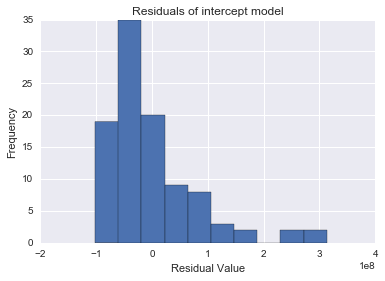

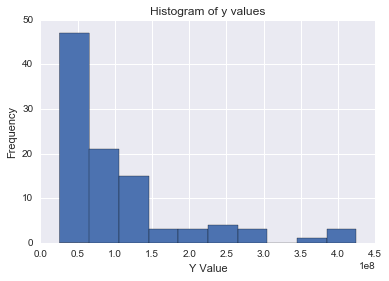

In [121]:
# Challenge 3

y, X = dmatrices('DomesticTotalGross ~ Rating', data=df, return_type='dataframe')

print X.head()

olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
ypred = olsres.predict(X)

residuals = (y['DomesticTotalGross'].values - ypred)
plt.hist(residuals)
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
plt.title('Residuals of intercept model')
plt.show()

plt.hist(y['DomesticTotalGross'].values)
plt.xlabel('Y Value')
plt.ylabel('Frequency')
plt.title('Histogram of y values')
plt.show()


Now the results look like halfway between the last two cases.  I interpret this as a kind of hierarchical model, where the model estimates the mean for each of of the categories.  This approximates a weak linear model.

MSE: 5.2e+15


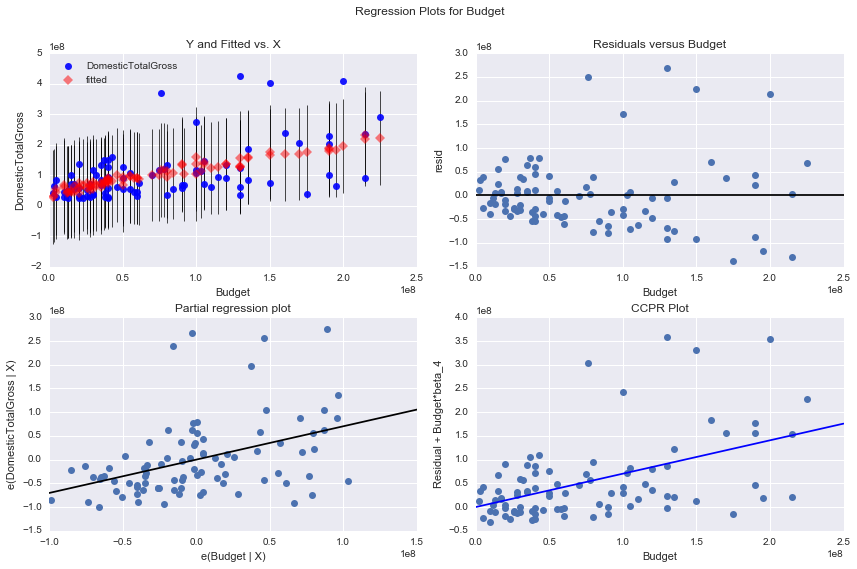

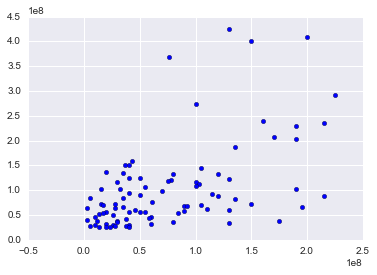

In [127]:
# Challenge 4
y, X = dmatrices('DomesticTotalGross ~ Budget + Runtime + Rating', data=df, return_type='dataframe')

olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
ypred = olsres.predict(X)

print "MSE: %.2g"%metrics.mean_squared_error(y, olsres.predict(X))

fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(olsres,'Budget', fig=fig)
plt.show()

plt.figure()
plt.scatter(X['Budget'], y)
plt.show()

Training set MSE: 7.4e+15
Test set MSE: 2.9e+15


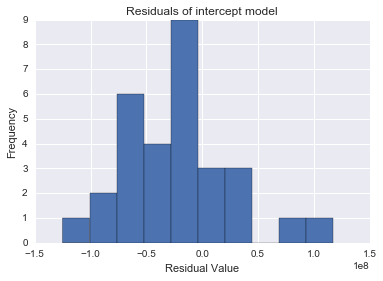

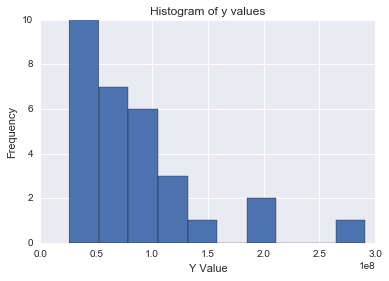

In [117]:
# Challenge 5
from sklearn import cross_validation as cv
from sklearn import metrics


y, X = dmatrices('DomesticTotalGross ~ Budget', data=df, return_type='dataframe')

x_train, x_test, y_train, y_test = cv.train_test_split(X,y,test_size=0.333,random_state=1234)

olsmod = sm.OLS(y_train, x_train)
olsres = olsmod.fit()
ypred = olsres.predict(x_test)


print "Training set MSE: %.2g"%metrics.mean_squared_error(y_train, olsres.predict(x_train))
print "Test set MSE: %.2g"%metrics.mean_squared_error(y_test, olsres.predict(x_test))


residuals = (y_test['DomesticTotalGross'].values - ypred)
plt.hist(residuals)
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
plt.title('Residuals of intercept model')
plt.show()

plt.hist(y_test['DomesticTotalGross'].values)
plt.xlabel('Y Value')
plt.ylabel('Frequency')
plt.title('Histogram of y values')
plt.show()
